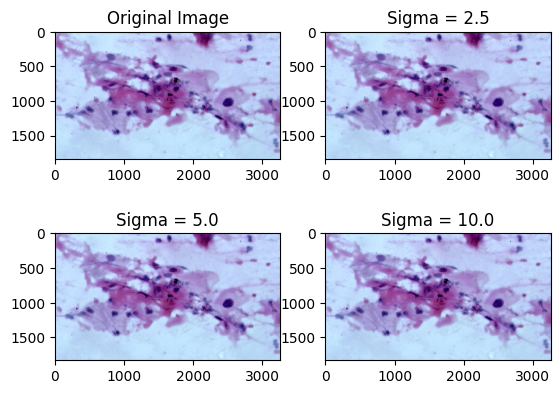

In [27]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt
# vì trong công thức gauss , tâm nằm ở điểm (0,0) còn trong ma trận là nằm ở (size//2 , size//2)
# do khác nhau về hệ trục tọa độ , nên ban đầu chúng ta sẽ tìm ra max_point và min_point ứng với trục gauss
# khi áp dụng gauss xong đối chiếu value vào ma trận thì mình - min_point
#gauss filter áp dụng cho ảnh màu và xám
def gaussian_kernel(size,sigma):
    if size % 2 == 0:
        size = size+1
    max_point = size //2 
    min_point = -max_point
    sum_val = 0
    K = np.zeros((size ,size))
    for x in range(min_point,max_point+1):
        for y in range(min_point,max_point+1):
            Emu = math.exp(-(x**2 + y**2) / (2*sigma**2))
            value = Emu/(2*math.pi*sigma**2)
            K[x-min_point][y-min_point] = value
            sum_val += value

    # chuẩn hóa kernel nhằm đảm bảo rằng tổng của tất cả các giá trị trong kernel là 1.
    #giúp hình ảnh kh bị sáng hay tối đi
    K/= sum_val
    return K

img = cv2.imread("1.jpg",1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
sigma_list=[2.5, 5.0, 10.0]
fig, axs = plt.subplots(2, 2)

axs[0,0].imshow(img)
axs[0,0].set_title("Original Image")

for i, sigma in enumerate(sigma_list):
    kernel = gaussian_kernel(sigma=sigma,size=5)
    img_gaussian = cv2.filter2D(img,-1,kernel)
    axs[(i+1)//2,i-1].imshow(img )
    axs[(i+1)//2,i-1].set_title(f'Sigma = {sigma}')
